## Anomaly Detection Using Seasonality Decomposition

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Read CSV File

In [33]:
df = pd.read_csv("data.csv",index_col=0)

Define constants

In [34]:
df.head()

,y_value
x_value,
0,4.181000
1,-1.364145
2,-0.416081
3,2.383078
4,-2.217664


In [35]:
SEASONAL_PERIOD = 200

 Get the trend by averaging (convolution) the values by window size = SEASONAL_PERIOD


In [36]:
df['trend'] = df['y_value'].rolling(window=SEASONAL_PERIOD, center=True).mean()

Plotting Trend

<AxesSubplot: xlabel='x_value'>

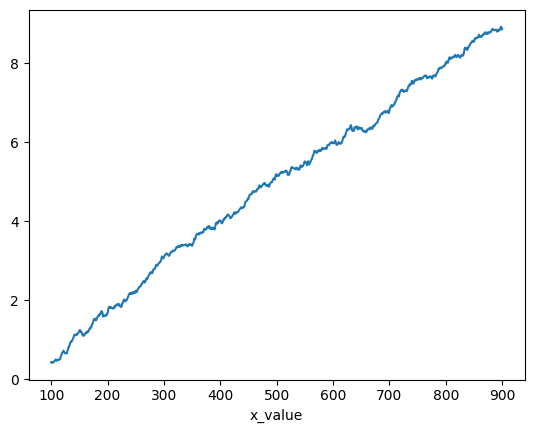

In [37]:
df['trend'].plot()

Decomposing seasonalilty

In [38]:
# Detrend the data by subtracting the trend
detrended = df['y_value'] - df['trend']

# Calculate seasonality by averaging each corresponding position in the 200-row period
seasonality = detrended.groupby(df.index % SEASONAL_PERIOD).mean()

# Map the seasonal values back to the original data
df['seasonal'] = df.index % SEASONAL_PERIOD
df['seasonal'] = df['seasonal'].map(seasonality)

Plotting Seasonal data

<AxesSubplot: xlabel='x_value'>

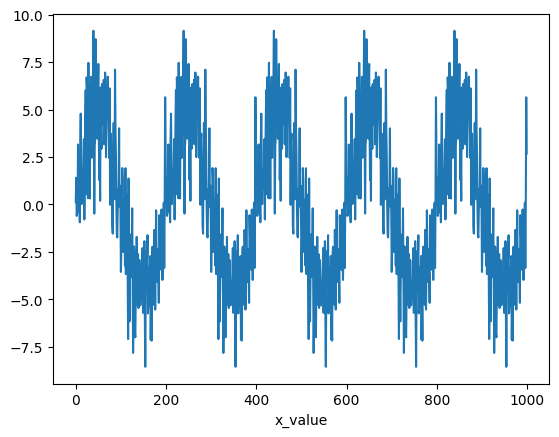

In [39]:
df['seasonal'].plot()

Subtract the trend and seasonal from values to get the residual

In [40]:
df['residual'] = df['y_value'] - df['trend'] - df['seasonal']

Plotting Residuals

<AxesSubplot: xlabel='x_value'>

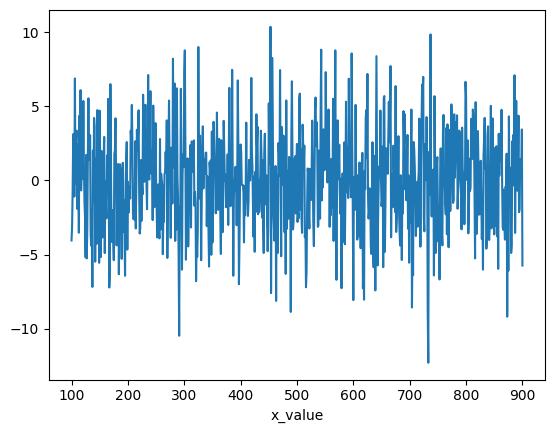

In [41]:
df['residual'].plot()

Calculate upper and lower limits of the residuals

In [42]:
resid_mean = df['residual'].mean()
resid_std = df['residual'].std()
lower = resid_mean - 3* resid_std
upper = resid_mean + 3* resid_std

Plotting Residuals outliers using a green box

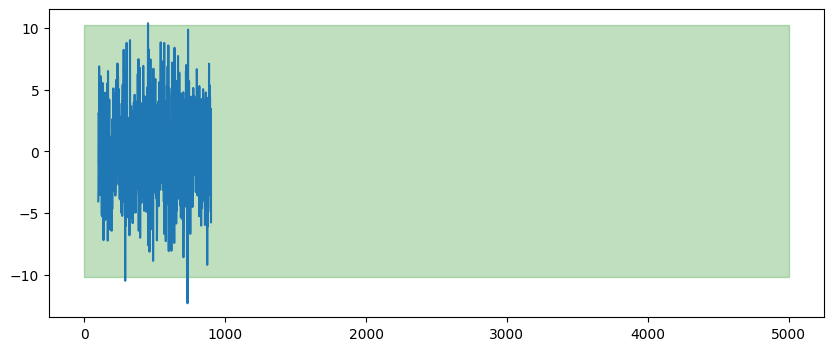

In [43]:
plt.figure(figsize=(10,4))
plt.plot(df['residual'].to_numpy())
plt.fill_between([0,5000],lower,upper,color='g',alpha=0.25)

Get the indexes of the outliers using the limits

In [44]:
outliers_indexes = df[(df['residual'] > upper) | (df['residual'] < lower)].index

Printing the values of anomalies

In [45]:
df['y_value'].loc[outliers_indexes]

x_value
291    -9.147505
453    18.122883
733    -9.342476
Name: y_value, dtype: float64

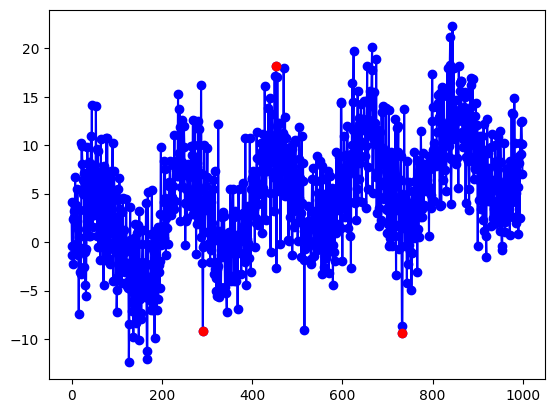

In [47]:
# Plot the data points using blue color
plt.plot(df.index,df['y_value'], label='Values', color='blue', marker='o')
# Highlight the outliers using red color
plt.plot(outliers_indexes, df.loc[outliers_indexes, 'y_value'], 'ro', label='Anomalies')